# Task 7-5 (Solution)
## Working with a Log File

In [1]:
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from folium import Map, plugins
from pygeoip import GeoIP, GeoIPError

In [2]:
filepath = '../../resources/new_access.log'

<br><br>
### Read the data from our the log file.  Display its shape, first few records, and column structure. 

In [3]:
log = pd.read_csv(filepath, sep=r'\s+', usecols=[0, 3, 5, 6, 7, 9], low_memory=False,
                   names=['addr', 'req_date', 'path', 'status', 'size', 'browser'])
log.shape

(463915, 6)

In [4]:
log.head()

,addr,req_date,path,status,size,browser
0,109.169.248.247,[12/Dec/2015:18:25:11,GET /administrator/ HTTP/1.1,200,4263,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...
1,109.169.248.247,[12/Dec/2015:18:25:11,POST /administrator/index.php HTTP/1.1,200,4494,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...
2,46.72.177.4,[12/Dec/2015:18:31:08,GET /administrator/ HTTP/1.1,200,4263,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...
3,46.72.177.4,[12/Dec/2015:18:31:08,POST /administrator/index.php HTTP/1.1,200,4494,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...
4,83.167.113.100,[12/Dec/2015:18:31:25,GET /administrator/ HTTP/1.1,200,4263,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...


In [5]:
log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463915 entries, 0 to 463914
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   addr      463915 non-null  object
 1   req_date  463915 non-null  object
 2   path      463915 non-null  object
 3   status    463915 non-null  int64 
 4   size      463914 non-null  object
 5   browser   463860 non-null  object
dtypes: int64(1), object(5)
memory usage: 21.2+ MB


<br><br>
### View the unique values in the *status* column.

In [6]:
log.status.unique()

array([200, 404, 500, 405, 301, 304, 501, 206, 403, 303, 412, 400],
      dtype=int64)

<br><br>
### Use *value_counts()* instead to get a better picture for each status value.

In [7]:
log.status.value_counts()

status
200    429216
404     29687
304      2517
206      1689
301       382
500       359
303        25
403        19
405        15
412         4
501         1
400         1
Name: count, dtype: int64

<br><br>
### Convert the date column, which is currently a string, into an actual datetime object.  View the results again.

In [8]:
log.req_date = pd.to_datetime(log.req_date, format='[%d/%b/%Y:%H:%M:%S')

In [9]:
log.head()

,addr,req_date,path,status,size,browser
0,109.169.248.247,2015-12-12 18:25:11,GET /administrator/ HTTP/1.1,200,4263,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...
1,109.169.248.247,2015-12-12 18:25:11,POST /administrator/index.php HTTP/1.1,200,4494,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...
2,46.72.177.4,2015-12-12 18:31:08,GET /administrator/ HTTP/1.1,200,4263,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...
3,46.72.177.4,2015-12-12 18:31:08,POST /administrator/index.php HTTP/1.1,200,4494,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...
4,83.167.113.100,2015-12-12 18:31:25,GET /administrator/ HTTP/1.1,200,4263,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...


In [10]:
log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463915 entries, 0 to 463914
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   addr      463915 non-null  object        
 1   req_date  463915 non-null  datetime64[ns]
 2   path      463915 non-null  object        
 3   status    463915 non-null  int64         
 4   size      463914 non-null  object        
 5   browser   463860 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 21.2+ MB


<br><br>
### Get a picture of which IP addresses made the most requests.  Do this by using groupby() capabilities.

In [11]:
top10_addrs = log.groupby('addr').size().nlargest(10)
top10_addrs

addr
149.56.83.40       62178
205.167.170.15     33302
134.249.53.185     17904
192.227.172.158    13474
195.154.216.79     10996
195.154.215.241     7705
41.75.96.130        5664
190.57.154.101      5662
154.0.14.250        5659
37.1.206.196        3780
dtype: int64

<br><br>
### Plot these results in a 'barh' graph.

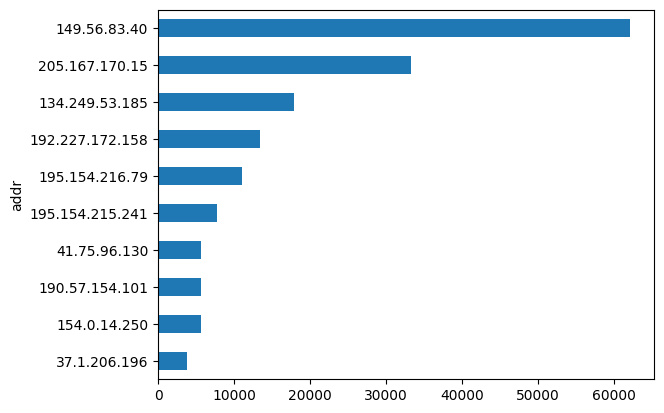

In [12]:
top10_addrs[::-1].plot(kind='barh');

<br><br>
### Create a new column containing only the HTTP Method (e.g., 'GET', 'POST', etc.)

In [13]:
log['method'] = log.path.apply(lambda cell: cell.split()[0])

In [14]:
log.head()

,addr,req_date,path,status,size,browser,method
0,109.169.248.247,2015-12-12 18:25:11,GET /administrator/ HTTP/1.1,200,4263,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...,GET
1,109.169.248.247,2015-12-12 18:25:11,POST /administrator/index.php HTTP/1.1,200,4494,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...,POST
2,46.72.177.4,2015-12-12 18:31:08,GET /administrator/ HTTP/1.1,200,4263,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...,GET
3,46.72.177.4,2015-12-12 18:31:08,POST /administrator/index.php HTTP/1.1,200,4494,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...,POST
4,83.167.113.100,2015-12-12 18:31:25,GET /administrator/ HTTP/1.1,200,4263,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...,GET


<br><br>
### Examine only the 'POST' records, and get the top 10 addresses making 'POST' requests

In [15]:
mask = log.method == 'POST'
top10_posts = log[mask].groupby('addr').size().nlargest(10)
top10_posts

addr
149.56.83.40       62177
192.227.172.158     6731
134.249.53.185      5968
41.75.96.130        5664
190.57.154.101      5662
154.0.14.250        5659
78.186.191.187      2840
200.148.166.42      2829
41.134.79.41        2719
158.69.186.125      2322
dtype: int64

<br><br>
### Plot these results in a 'barh' graph again.

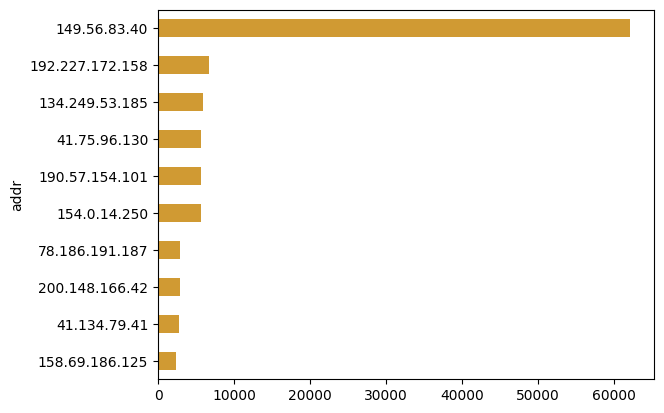

In [16]:
top10_posts[::-1].plot(kind='barh', color=['#d09a33']);

<br><br>
### Lookup IP addresses retrieving city, country, latitude, and longitude information for each one

In [17]:
ip_addr_lookup_file = '../../resources/GeoLiteCity.dat'

In [18]:
geoip = GeoIP(ip_addr_lookup_file)
geoip.record_by_addr('149.56.83.40')

{'dma_code': 0,
 'area_code': 0,
 'metro_code': None,
 'postal_code': 'H3A',
 'country_code': 'CA',
 'country_code3': 'CAN',
 'country_name': 'Canada',
 'continent': 'NA',
 'region_code': 'QC',
 'city': 'Montréal',
 'latitude': 45.50399999999999,
 'longitude': -73.5747,
 'time_zone': 'America/Montreal'}

In [19]:
def get_location(addr):
    results = ['', '', 0, 0]
    try:
        info = geoip.record_by_addr(addr)
        if info:
            results = [info.get('country_name'), info.get('city'), info.get('latitude'), info.get('longitude')]
    except GeoIPError:
        pass
    
    return results

In [20]:
results = log.addr.apply(get_location)

In [21]:
locations = pd.DataFrame(results.to_numpy().tolist(), columns=['country', 'city', 'latitude', 'longitude'])

In [22]:
locations.head()

,country,city,latitude,longitude
0,Russian Federation,Chapaevsk,52.9781,49.7197
1,Russian Federation,Chapaevsk,52.9781,49.7197
2,Russian Federation,Kursk,51.8830,36.2659
3,Russian Federation,Kursk,51.8830,36.2659
4,Russian Federation,Moscow,55.7522,37.6156


<br><br>
### Join the original DataFrame and the new results together using concat()

In [23]:
merged = pd.concat([log, locations], axis=1)
merged.head()

,addr,req_date,path,status,size,browser,method,country,city,latitude,longitude
0,109.169.248.247,2015-12-12 18:25:11,GET /administrator/ HTTP/1.1,200,4263,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...,GET,Russian Federation,Chapaevsk,52.9781,49.7197
1,109.169.248.247,2015-12-12 18:25:11,POST /administrator/index.php HTTP/1.1,200,4494,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...,POST,Russian Federation,Chapaevsk,52.9781,49.7197
2,46.72.177.4,2015-12-12 18:31:08,GET /administrator/ HTTP/1.1,200,4263,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...,GET,Russian Federation,Kursk,51.8830,36.2659
3,46.72.177.4,2015-12-12 18:31:08,POST /administrator/index.php HTTP/1.1,200,4494,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...,POST,Russian Federation,Kursk,51.8830,36.2659
4,83.167.113.100,2015-12-12 18:31:25,GET /administrator/ HTTP/1.1,200,4263,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...,GET,Russian Federation,Moscow,55.7522,37.6156


<br><br>
### Plot the top 10 cities identified within the newly merged DataFrame.  Hint: *.groupby('city')*

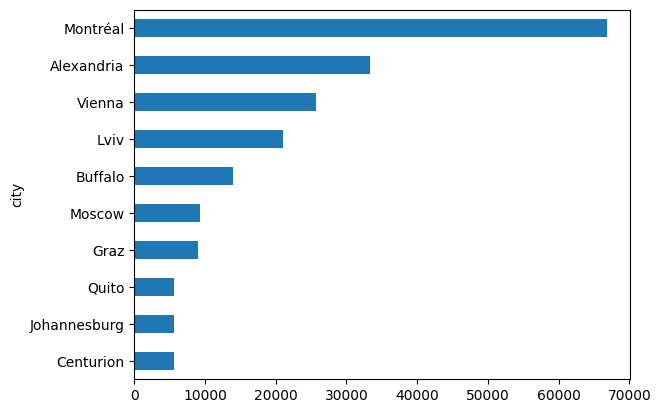

In [24]:
top10_cities = merged.groupby('city').size().nlargest(10)
top10_cities[::-1].plot(kind='barh');

<br><br>
### Plot these cities in a world map

In [25]:
lat_longs = []
for city in top10_cities.index:
    latitude = merged.loc[city == merged['city'], 'latitude']
    longitude = merged.loc[city == merged['city'], 'longitude']
    lat_longs.append((latitude.iloc[0], longitude.iloc[0]))

In [ ]:
lat_longs

In [26]:
map = Map(location=[40, -60], tiles="OpenStreetMap", zoom_start=3)
hm = plugins.HeatMap(lat_longs, radius=15, blur=10)
hm.add_to(map)
map